In [1]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/home/fahimeh/miniconda3/envs/mlprac2/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")
print("Path to dataset files:", path)

Path to dataset files: /home/fahimeh/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [3]:
books = pd.read_csv(f"{path}/books.csv")
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [5]:
# How many missing values we have
books.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [6]:
# Category is one of the important features, lets see how it is
books['categories'].value_counts()

categories
Fiction                                  2588
Juvenile Fiction                          538
Biography & Autobiography                 401
History                                   264
Literary Criticism                        166
                                         ... 
Authors, Cuban                              1
Death (Fictitious character : Gaiman)       1
Astronomers                                 1
Epic literature                             1
Girls                                       1
Name: count, Length: 567, dtype: int64

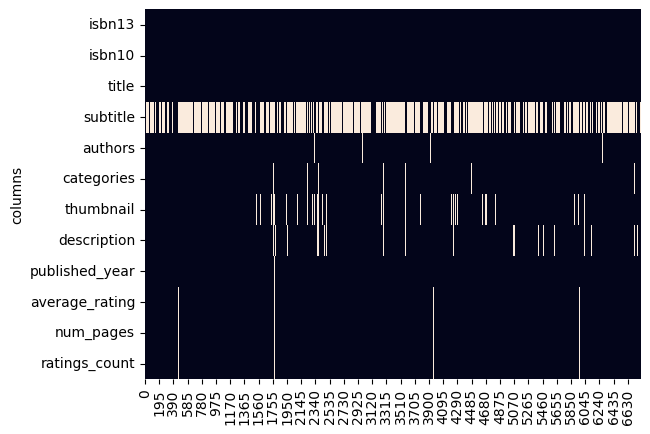

In [7]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)
plt.ylabel('columns')
plt.show()

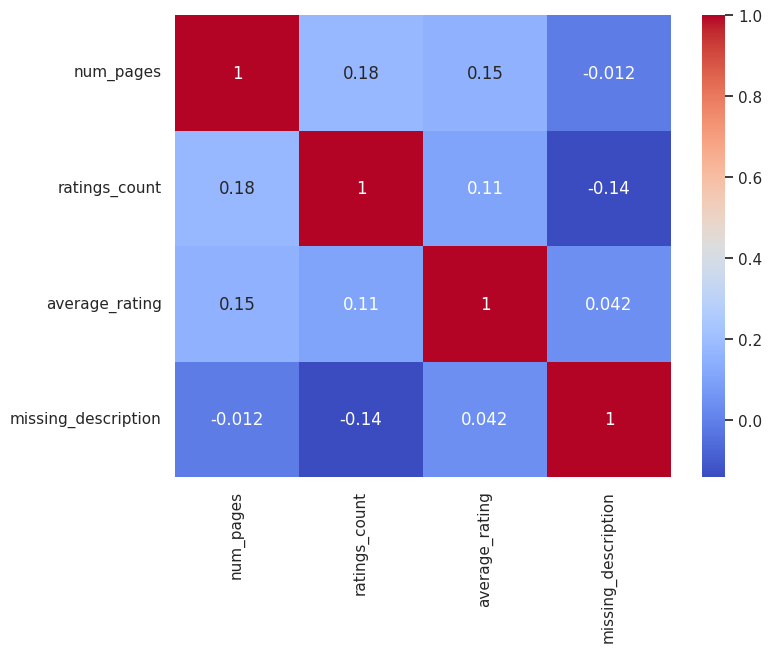

In [8]:
books['missing_description'] = np.where(books['description'].isna(),1,0)
columns_of_interest = ['num_pages', 'ratings_count', 'average_rating', 'missing_description']
correlation_matrix = books[columns_of_interest].corr(method = "spearman")\

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

In [9]:
# Now we would like to know how many books we have we this missing values
books = books.iloc[np.where(~books['description'].isna() & 
                            ~books['num_pages'].isna() &
                            ~books['published_year'].isna() &
                            ~books['average_rating'].isna())]

/tmp/ipykernel_676294/3260070604.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_counts, y='count', x='category', palette='viridis')


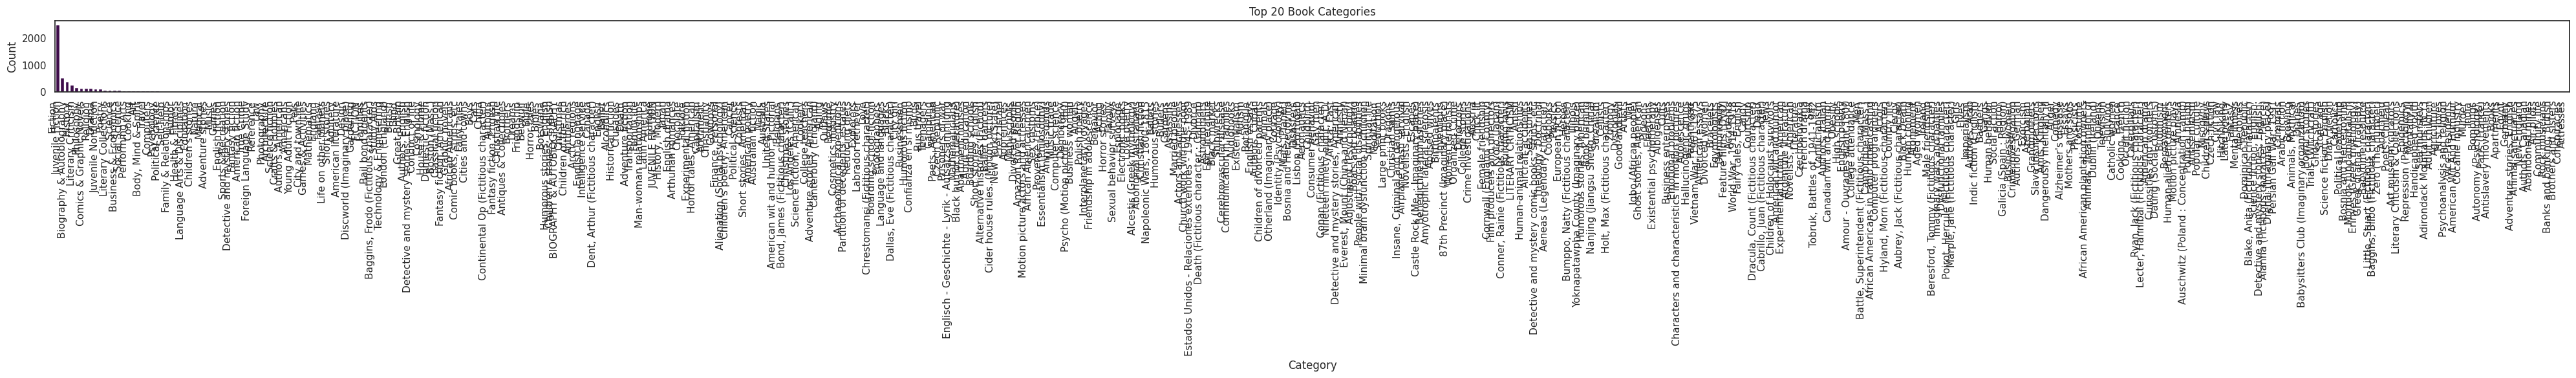

In [10]:
cat_counts = books['categories'].value_counts().reset_index()
cat_counts.columns = ['category', 'count']

# Plot
plt.figure(figsize=(40,6))
sns.barplot(data=cat_counts, y='count', x='category', palette='viridis')
plt.title('Top 20 Book Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

(array([3.868e+03, 1.143e+03, 6.320e+02, 4.410e+02, 2.240e+02, 9.700e+01,
        5.200e+01, 2.200e+01, 1.100e+01, 1.000e+01, 2.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,  46.95,  92.9 , 138.85, 184.8 , 230.75, 276.7 , 322.65,
        368.6 , 414.55, 460.5 , 506.45, 552.4 , 598.35, 644.3 , 690.25,
        736.2 , 782.15, 828.1 , 874.05, 920.  ]),
 <BarContainer object of 20 artists>)

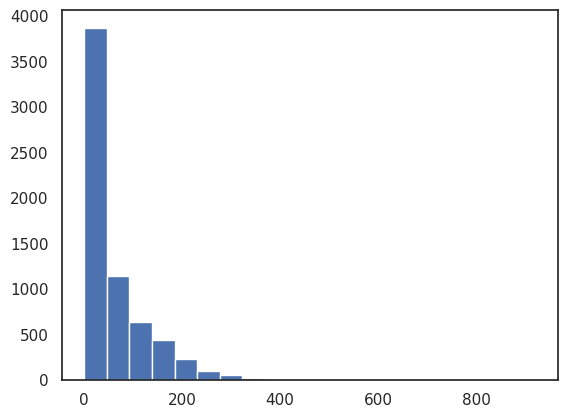

In [11]:
books['words_in_description'] = books['description'].str.split().str.len()
plt.hist(books['words_in_description'], bins=20)

In [12]:
print("number of books with less than 25 words in description is: ", np.sum(books['words_in_description'] < 25))
books['words_in_description'] = books['description'].str.split().str.len()
books = books[books['words_in_description'] >=25]

number of books with less than 25 words in description is:  1310


In [13]:
# We create another column for the combination of subtitle and title. 
books["title_and_subtitle"] = np.where(books['subtitle'].isna(), books['title'], books['title']+ "_" +books['subtitle'])
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,205,Spider's Web_A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,75,The Problem of Pain


In [14]:
# Also we are going to create a unique identifier using the isbn 
books["tag_description"] = books["isbn13"].astype(str) + "_" + books['description']

In [15]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,words_in_description,title_and_subtitle,tag_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,199,Gilead,9780002005883_A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,205,Spider's Web_A Novel,9780002261982_A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,57,Rage of angels,"9780006178736_A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,45,The Four Loves,9780006280897_Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,75,The Problem of Pain,"9780006280934_""In The Problem of Pain, C.S. Le..."


In [18]:
drop_cols = ["subtitle", "missing_description", "words_in_description"]
books = books.drop(drop_cols, axis=1)

In [21]:
# Now lets save the final cleand csv file
books.to_csv("cleaned_books_dataset.csv", index=False)